In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.set_cmap('viridis')
import scipy.io as sio
import time
import sys
proj = '/home/matsui-k/projects/d-rcn'
sys.path.append('/home/matsui-k/projects/d-rcn')
from scripts.core import TN_utils

In [37]:
reload(TN_utils)

<module 'scripts.core.TN_utils' from '/home/matsui-k/projects/d-rcn/scripts/core/TN_utils.py'>

In [4]:
ms = sio.loadmat('/home/matsui-k/projects/d-rcn/data/blind/Mcontra_fodfL=12.mat')

In [7]:
ms['Mcontra_fodf'].shape

(91, 256)

In [36]:
TN_utils.make_index(4)

[(0, 1), (1, 6), (6, 15)]

In [14]:
M = ms['Mcontra_fodf']

In [26]:
L = 8
M_t = M[:TN_utils.make_index(L)[-1][1]].T
M_t.shape

(256, 45)

In [28]:
pad = np.zeros((M_t.shape[0], M_t.shape[1]*2))
pad.shape

(256, 90)

In [30]:
pad[:, ::2] = np.real(M_t)
pad[:, 1::2] = -np.imag(M_t)

In [33]:
M_t[0]

array([  3.90625000e-03 +0.00000000e+00j,
         2.31909638e-04 -5.38885956e-05j,
         3.31947660e-03 -3.80601487e-04j,
         1.89480550e-02 +0.00000000e+00j,
        -3.31947660e-03 -3.80601487e-04j,
         2.31909638e-04 +5.38885956e-05j,
         6.53839443e-06 -3.21207661e-06j,
         1.36180810e-04 -4.85518378e-05j,
         1.57918082e-03 -3.66952565e-04j,
         1.05288884e-02 -1.20721158e-03j,
         3.17180291e-02 +0.00000000e+00j,
        -1.05288884e-02 -1.20721158e-03j,
         1.57918082e-03 +3.66952565e-04j,
        -1.36180810e-04 -4.85518378e-05j,
         6.53839443e-06 +3.21207661e-06j,
         1.47343189e-07 -1.20362243e-07j,
         3.89139294e-06 -2.49861550e-06j,
         6.19673315e-05 -3.04423079e-05j,
         6.62757221e-04 -2.36289393e-04j,
         4.74762138e-03 -1.10319972e-03j,
         2.08263619e-02 -2.38788979e-03j,
         4.06367194e-02 +0.00000000e+00j,
        -2.08263619e-02 -2.38788979e-03j,
         4.74762138e-03 +1.1031997

In [34]:
pad[0]

array([  3.90625000e-03,  -0.00000000e+00,   2.31909638e-04,
         5.38885956e-05,   3.31947660e-03,   3.80601487e-04,
         1.89480550e-02,  -0.00000000e+00,  -3.31947660e-03,
         3.80601487e-04,   2.31909638e-04,  -5.38885956e-05,
         6.53839443e-06,   3.21207661e-06,   1.36180810e-04,
         4.85518378e-05,   1.57918082e-03,   3.66952565e-04,
         1.05288884e-02,   1.20721158e-03,   3.17180291e-02,
        -0.00000000e+00,  -1.05288884e-02,   1.20721158e-03,
         1.57918082e-03,  -3.66952565e-04,  -1.36180810e-04,
         4.85518378e-05,   6.53839443e-06,  -3.21207661e-06,
         1.47343189e-07,   1.20362243e-07,   3.89139294e-06,
         2.49861550e-06,   6.19673315e-05,   3.04423079e-05,
         6.62757221e-04,   2.36289393e-04,   4.74762138e-03,
         1.10319972e-03,   2.08263619e-02,   2.38788979e-03,
         4.06367194e-02,  -0.00000000e+00,  -2.08263619e-02,
         2.38788979e-03,   4.74762138e-03,  -1.10319972e-03,
        -6.62757221e-04,

In [38]:
a = TN_utils.load_Mreconstruct(max_L=8) 

M_t.shape (256, 45)
pad.shape (256, 90)


In [39]:
a.shape

(256, 90)

(array([     0.,      0.,      0.,      0.,      0.,  23040.,      0.,
             0.,      0.,      0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

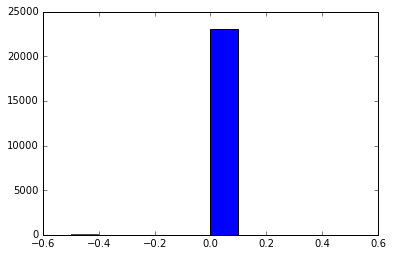

In [41]:
plt.hist((a - pad).flatten())